In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.DataFrame({'City': ['Sydney', 'Sydney', 'Sydney', 'Perth', 'Perth', 'Perth', 'Brisbane', 'Brisbane', 'Brisbane'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,Sydney,3999
1,Sydney,4000
2,Sydney,4001
3,Perth,3499
4,Perth,3500
5,Perth,3501
6,Brisbane,2499
7,Brisbane,2500
8,Brisbane,2501


In [3]:
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_Brisbane,city_Perth,city_Sydney
0,3999,0,0,1
1,4000,0,0,1
2,4001,0,0,1
3,3499,0,1,0
4,3500,0,1,0
5,3501,0,1,0
6,2499,1,0,0
7,2500,1,0,0
8,2501,1,0,0


In [4]:
lin_reg = linear_model.LinearRegression()

In [5]:
lin_reg.fit(one_hot_df[['city_Perth', 'city_Sydney', 'city_Brisbane']], one_hot_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [7]:
lin_reg.intercept_

3333.3333333333335

In [8]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [9]:
df['Rent'].mean()

3333.3333333333335

In [10]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_Perth,city_Sydney
0,3999,0,1
1,4000,0,1
2,4001,0,1
3,3499,1,0
4,3500,1,0
5,3501,1,0
6,2499,0,0
7,2500,0,0
8,2501,0,0


In [11]:
lin_reg.fit(dummy_df[['city_Perth', 'city_Sydney']], dummy_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lin_reg.coef_

array([1000., 1500.])

In [13]:
lin_reg.intercept_

2500.0000000000005

In [14]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

In [15]:
effect_df = dummy_df.copy()

In [16]:
effect_df.loc[3:5, ['city_Perth', 'city_Sydney']] = -1.0
effect_df

,Rent,city_Perth,city_Sydney
0,3999,0.0,1.0
1,4000,0.0,1.0
2,4001,0.0,1.0
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,0.0,0.0
7,2500,0.0,0.0
8,2501,0.0,0.0


In [17]:
lin_reg.fit(effect_df[['city_Perth', 'city_Sydney']], effect_df['Rent'])
lin_reg.coef_

array([-2500.,  1500.])

In [18]:
lin_reg.intercept_

2500.000000000001

In [19]:
# illustration of rental price in cities
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

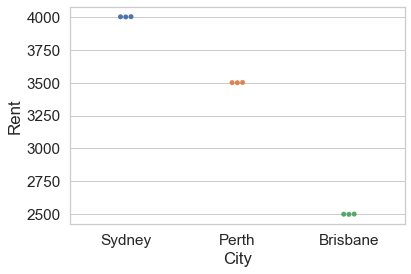

In [20]:
sns.swarmplot(x="City", y="Rent", data=df);

In [21]:
print('One-hot encoding weights: ' ,w1, ' and intercept: ', b1)
print('Dummy encoding weights: ' ,w2, ' and intercept: ', b2)

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333]  and intercept:  3333.3333333333335
Dummy encoding weights:  [1000. 1500.]  and intercept:  2500.0000000000005


In [22]:
dummy_df.head(2)

,Rent,city_Perth,city_Sydney
0,3999,0,1
1,4000,0,1


In [23]:
# geometry of one-hot vs. dummy encoding

# Create a list of values in the best fit line for one-hot encoding
one_hot_y = [((w1[0] * one_hot_df.city_Perth[i]) + 
              (w1[1] * one_hot_df.city_Sydney[i]) +
              (w1[2] * one_hot_df.city_Brisbane[i]) + b1) 
             for i in range(0,one_hot_df.shape[0])]

# Create a list of values in the best fit line for dummy coding
dummy_y = [((w2[0] * dummy_df.city_Perth[i]) +
            (w2[1] * dummy_df.city_Sydney[i]) + b2)
           for i in range(0,dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0, 4000.0, 4000.0, 3500.0000000000005, 3500.0000000000005, 3500.0000000000005, 2500.0, 2500.0, 2500.0]
[4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0000000000005, 2500.0000000000005, 2500.0000000000005]
